In [1]:
# Dependencies and Setup
import pandas as pd
import demoji
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

# File to Load
chart_path = "spotify_charts.csv"

# Read Chart Data File and store into Pandas DataFrames
chart_data = pd.read_csv(chart_path, encoding='utf-8')

<font size="5">Question 1</font>

Which countries were the most influential on the global Spotify market?

In [2]:
# remove global from the regions column
regional_df = chart_data[chart_data["region"] != "Global"]

In [3]:
# count countries
len(regional_df['region'].unique())

68

In [4]:
#create new df based on region
top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()
top_countries

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_48305/929104590.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()


,total streams
region,
Argentina,1.953381e+10
Australia,2.012821e+10
Austria,2.703191e+09
Belgium,3.883143e+09
Bolivia,1.170959e+09
...,...
United Arab Emirates,3.050062e+08
United Kingdom,3.640880e+10
United States,1.421321e+11


In [5]:


#sort df to find top streaming countries
sorted_countries = top_countries.sort_values('total streams', ascending = False)

#variable for top ten countries
top_ten = sorted_countries.head(10)

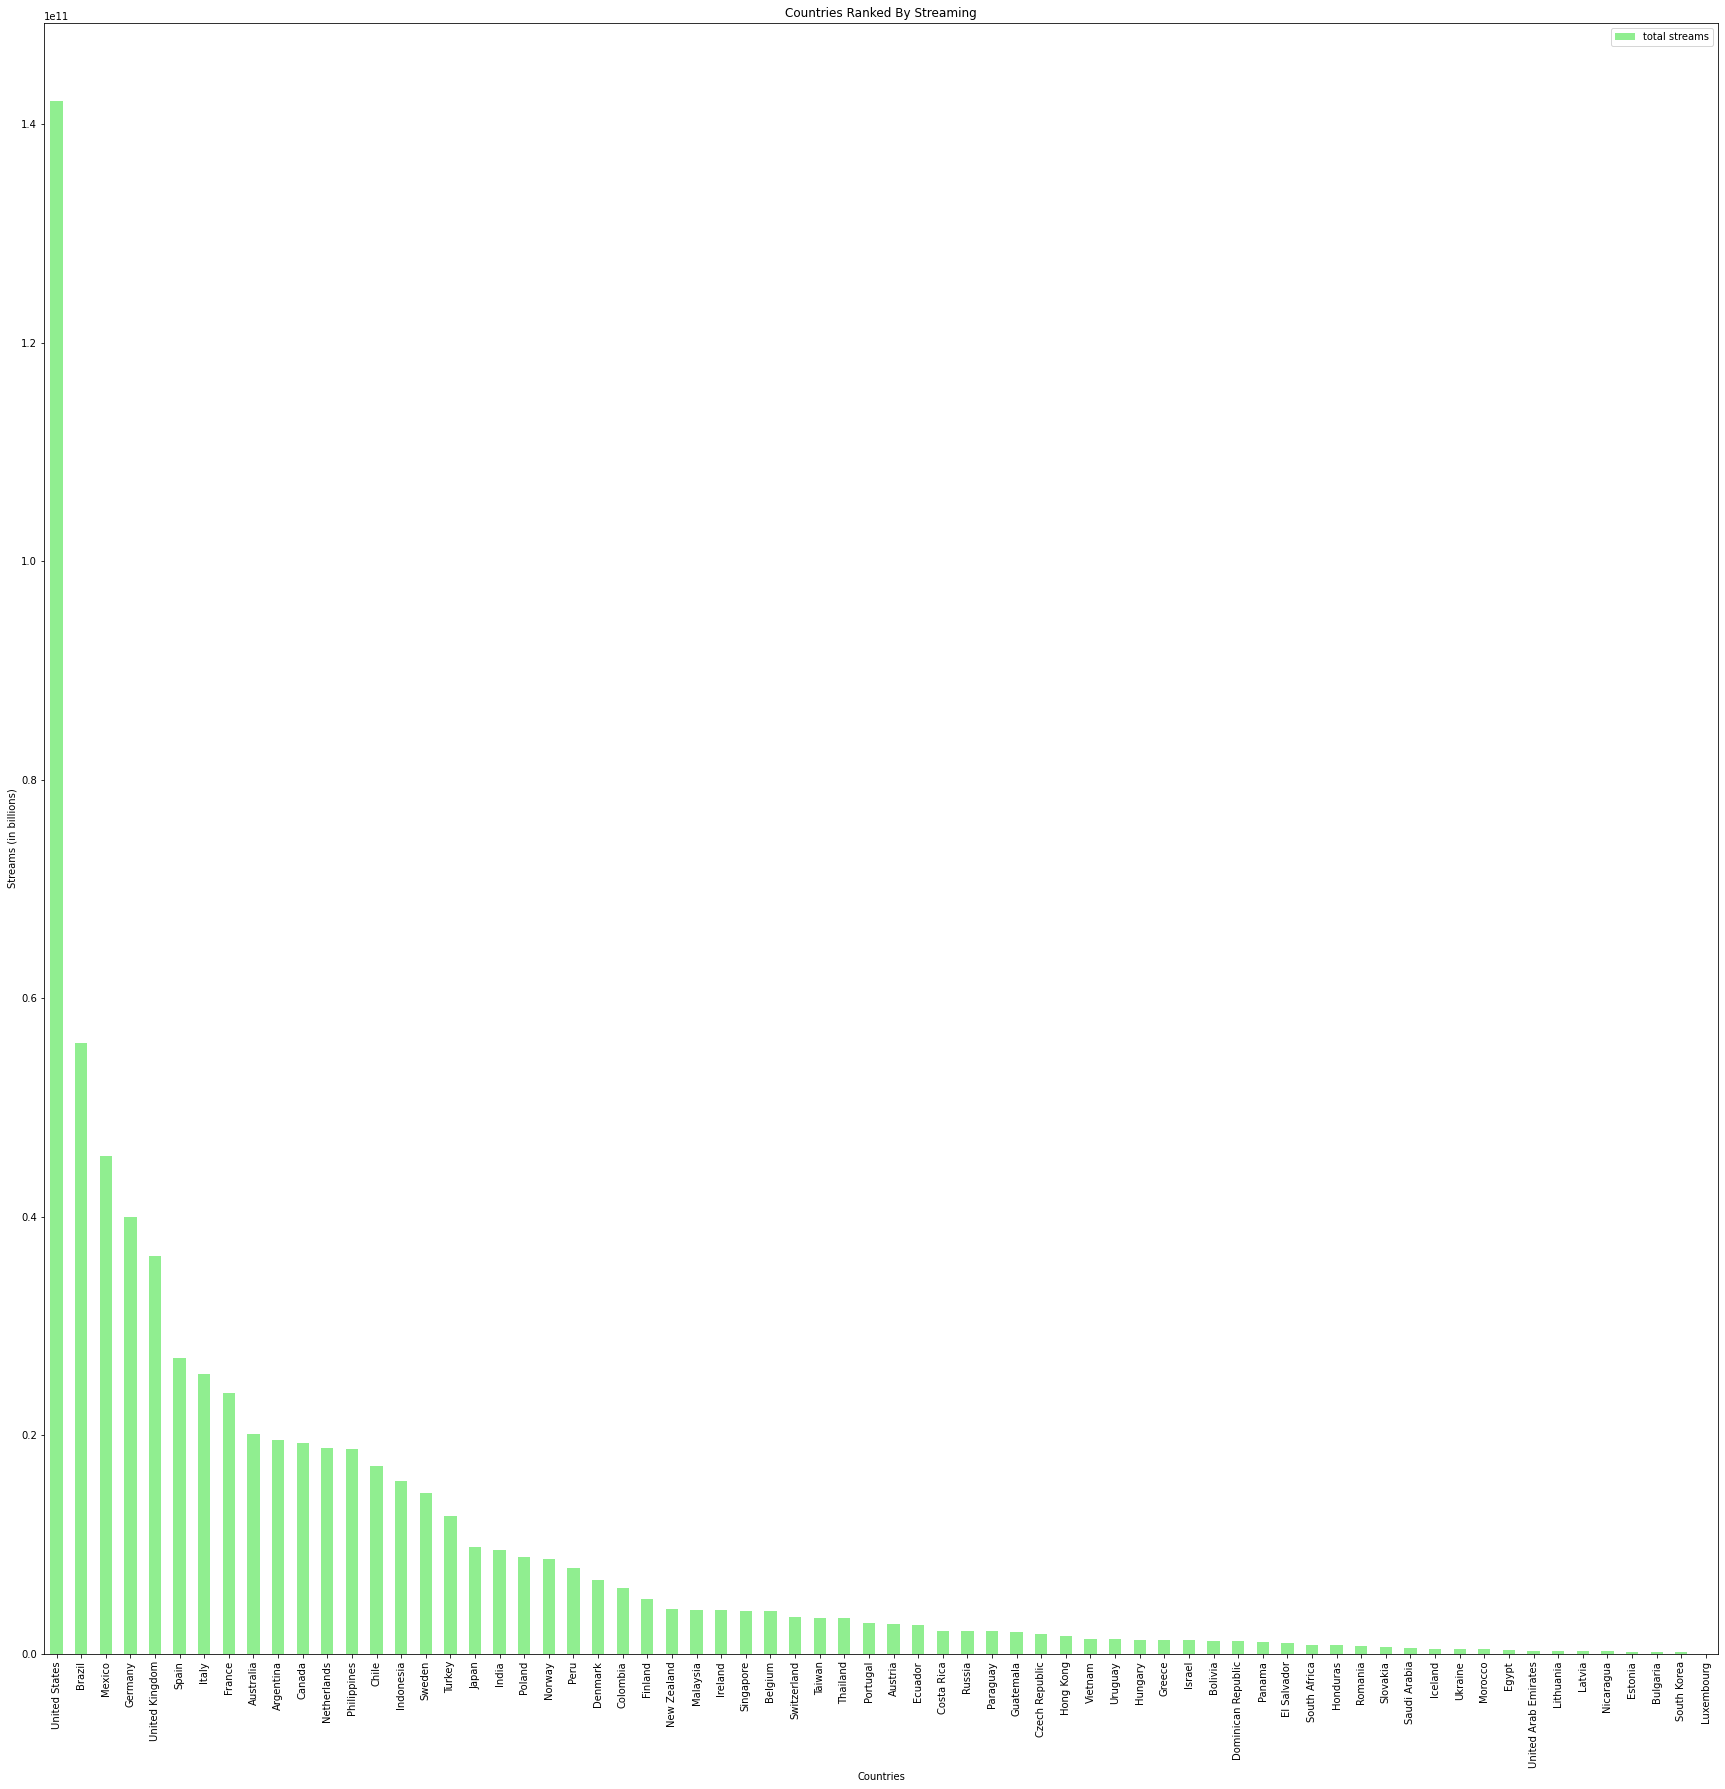

In [6]:
#create bar plot to show all countries streams 
sorted_countries_plot = sorted_countries.plot.bar(y='total streams', figsize =(30,30), width=.5, alpha=1, align="center", color = "lightgreen")

#adds title to bar chart  
plt.title("Countries Ranked By Streaming")

#label xaxis
plt.xlabel("Countries")

#lable yaxis
plt.ylabel("Streams (in billions)")

#rotate xticks to fit lables
plt.xticks(rotation = 90)

#export chart to pngs
plt.savefig("Countries_By_Streaming.png")

#show graph 
plt.show() 

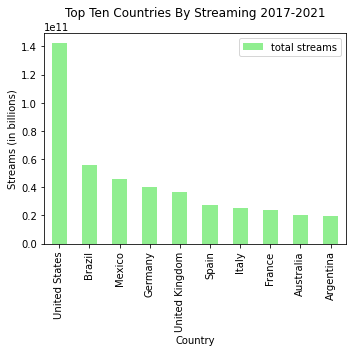

In [7]:
#create bar plot to show top 10 countries streams 
top_countries_plot = top_ten.plot.bar(y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Countries By Streaming 2017-2021")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (in billions)")

#top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("Top_Ten_Countries_by_Streaming.png")

#show graph 
plt.show()

In [8]:
#Find total streams for US
us = regional_df.loc[regional_df["region"] == "United States"]

#sum total streams
us_streaming = us["total streams"].sum()
us_streaming

142132086404.0

In [9]:
# #Find total streams overall
# overall = regional_df.loc[regional_df["region"] != "United States"]

#Sum total streams overall
overall_streaming = regional_df["total streams"].sum()

#Calcuate percent of streams that are from US
us_percent_streaming = (us_streaming/overall_streaming) * 100

#print streaming percentage
us_percent_streaming

print(f"The U.S. market makes up {us_percent_streaming}% of the total global Spotify streams from 2017-2021.")

The U.S. market makes up 20.78833584283174% of the total global Spotify streams from 2017-2021.


In [10]:
#BRANCHED CODE:
#pie chart comparing total US streams to all other regions:

#remove global and United States from the regions column
non_us_df = chart_data[(chart_data["region"] != "Global") & (chart_data["region"] != "United States")]
non_us_df['total streams'].sum()

541578661193.0

In [11]:
#count countries - 
countries_count = [non_us_df['total streams'].sum(),us['total streams'].sum()]
countries_count

usvglobe_dict = pd.DataFrame({'Country': ['International', 'United States'],
                          'Total Countries':countries_count})

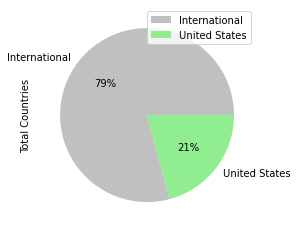

In [12]:
colors = ['silver', 'lightgreen']
usvglobe_dict.groupby(['Country']).sum().plot(kind='pie', y='Total Countries',autopct='%1.0f%%',colors=colors)

#export chart to pngs
plt.savefig("US_Streaming_Percentage.png")

plt.show()

<font size="5">Question 2</font>

What are the top ranked songs globally and in the top streaming country?

Top Songs 2017

In [13]:
# countries_count = [regional_df['title'].sum(),us['total streams'].sum()]
df_2017 = regional_df[(regional_df["date"] == 2017)]
df_2017.head()

,date,title,artist,region,total streams
0,2017,"""All That Is or Ever Was or Ever Will Be""",Alan Silvestri,Poland,3547.0
1,2017,"""All That Is or Ever Was or Ever Will Be""",Alan Silvestri,Turkey,3764.0
2,2017,"""Read All About It, Pt. III""",Emeli Sandé,Belgium,15971.0
3,2017,"""Read All About It, Pt. III""",Emeli Sandé,Czech Republic,6855.0
4,2017,"""Read All About It, Pt. III""",Emeli Sandé,Denmark,6967.0


In [14]:
# double bracket to keep from changing to a series, this line also totals the non global streams for each song
songs_by_total_streams=df_2017.groupby("title")[["total streams"]].sum()
songs_by_total_streams

,total streams
title,
"""All That Is or Ever Was or Ever Will Be""",7311.0
"""Read All About It, Pt. III""",57025.0
#99,31826.0
#Askip,296862.0
#Biziz - feat. Lil Bege,403591.0
...,...
불타오르네 FIRE,184096.0
에너제틱 Energetic,22362.0
에너제틱 Energetic - Prequel Remix,1326.0


In [15]:
# check to make sure it is still a dataframe and not a series 
type(songs_by_total_streams)

pandas.core.frame.DataFrame

In [16]:
# sort dataframe of all 2017 songs by total streams 
songs_2017 = songs_by_total_streams.sort_values('total streams', ascending = False)
songs_2017
# # how many times each song appears in the data frame
# df_2017["title"].value_counts()

,total streams
title,
Shape of You,1.485011e+09
Despacito - Remix,9.013116e+08
Despacito (Featuring Daddy Yankee),7.139895e+08
Something Just Like This,6.848113e+08
Unforgettable,6.757906e+08
...,...
Eső,1.002000e+03
Hlavarozbitajakslovensko,1.002000e+03
Ir Vērts,1.002000e+03


In [17]:
# songs_2017.reset_index()

In [18]:
#save top ten rows by streaming 
top_songs_2017 = songs_2017.head(10)

#print top ten
top_songs_2017.reset_index()

,title,total streams
0,Shape of You,1.485011e+09
1,Despacito - Remix,9.013116e+08
2,Despacito (Featuring Daddy Yankee),7.139895e+08
3,Something Just Like This,6.848113e+08
4,Unforgettable,6.757906e+08
5,HUMBLE.,6.383807e+08
6,rockstar,5.923562e+08
7,It Ain't Me (with Selena Gomez),5.819983e+08
8,That's What I Like,5.527117e+08
9,Attention,5.482537e+08


In [42]:
#save top 100 rows by streaming for further analaysis
top_songs_2017_ext = songs_2017.head(100).reset_index()
top_songs_2017_ext

,title,total streams
0,Shape of You,1.485011e+09
1,Despacito - Remix,9.013116e+08
2,Despacito (Featuring Daddy Yankee),7.139895e+08
3,Something Just Like This,6.848113e+08
4,Unforgettable,6.757906e+08
...,...,...
95,Lonely Together (feat. Rita Ora),2.050320e+08
96,Starving,2.013253e+08
97,Weak,2.007547e+08
98,Hear Me Now,1.997880e+08


In [19]:
# top_songs_17_global = top_songs_2017["title"]
# top_songs_17_global

In [20]:
#create datframe for US 2017
df_US_2017 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2017)]

#sort df by total streams 
songs_US_2017 = df_US_2017.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2017 = songs_US_2017.head(10)

#print top ten
top_songs_US_2017

,date,title,artist,region,total streams
20921,2017,HUMBLE.,Kendrick Lamar,United States,334342280.0
11196,2017,Congratulations,"Post Malone, Quavo",United States,280284916.0
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
33970,2017,Mask Off,Future,United States,239307360.0
12993,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068.0
64210,2017,rockstar,"Post Malone, 21 Savage",United States,225517132.0
64085,2017,iSpy (feat. Lil Yachty),KYLE,United States,224773101.0
31732,2017,Location,Khalid,United States,222266305.0
268,2017,1-800-273-8255,"Logic, Alessia Cara, Khalid",United States,216950629.0
58449,2017,Unforgettable,"French Montana, Swae Lee",United States,215180711.0


In [40]:
#save top 100 rows by streaming for further analysis section
top_songs_US_2017_ext = songs_US_2017.head(100)
top_songs_US_2017

,date,title,artist,region,total streams
20921,2017,HUMBLE.,Kendrick Lamar,United States,334342280.0
11196,2017,Congratulations,"Post Malone, Quavo",United States,280284916.0
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
33970,2017,Mask Off,Future,United States,239307360.0
12993,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068.0
64210,2017,rockstar,"Post Malone, 21 Savage",United States,225517132.0
64085,2017,iSpy (feat. Lil Yachty),KYLE,United States,224773101.0
31732,2017,Location,Khalid,United States,222266305.0
268,2017,1-800-273-8255,"Logic, Alessia Cara, Khalid",United States,216950629.0
58449,2017,Unforgettable,"French Montana, Swae Lee",United States,215180711.0


In [21]:
# perform outer merge to include US streams and the sum of non global streams for each song
outer_merged = pd.merge(top_songs_2017, top_songs_US_2017, how="outer", on=["title"])
len(outer_merged)
outer_merged

,title,total streams_x,date,artist,region,total streams_y
0,Shape of You,1.485011e+09,2017.0,Ed Sheeran,United States,278916058.0
1,Despacito - Remix,9.013116e+08,2017.0,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068.0
2,Despacito (Featuring Daddy Yankee),7.139895e+08,NaN,NaN,NaN,NaN
3,Something Just Like This,6.848113e+08,NaN,NaN,NaN,NaN
4,Unforgettable,6.757906e+08,2017.0,"French Montana, Swae Lee",United States,215180711.0
5,HUMBLE.,6.383807e+08,2017.0,Kendrick Lamar,United States,334342280.0
6,rockstar,5.923562e+08,2017.0,"Post Malone, 21 Savage",United States,225517132.0
7,It Ain't Me (with Selena Gomez),5.819983e+08,NaN,NaN,NaN,NaN
8,That's What I Like,5.527117e+08,NaN,NaN,NaN,NaN
9,Attention,5.482537e+08,NaN,NaN,NaN,NaN


In [25]:
#create variable for US total streams 
us_songs_2017 = top_songs_US_2017["total streams"]
us_songs_2017

20921    334342280.0
11196    280284916.0
48223    278916058.0
33970    239307360.0
12993    232299068.0
64210    225517132.0
64085    224773101.0
31732    222266305.0
268      216950629.0
58449    215180711.0
Name: total streams, dtype: float64

In [26]:
#create variable for global total streams 
global_songs_2017 = top_songs_2017["total streams"]
global_songs_2017

title
Shape of You                          1.485011e+09
Despacito - Remix                     9.013116e+08
Despacito (Featuring Daddy Yankee)    7.139895e+08
Something Just Like This              6.848113e+08
Unforgettable                         6.757906e+08
HUMBLE.                               6.383807e+08
rockstar                              5.923562e+08
It Ain't Me (with Selena Gomez)       5.819983e+08
That's What I Like                    5.527117e+08
Attention                             5.482537e+08
Name: total streams, dtype: float64

In [27]:
#create df for global vs us streams 
global_vs_us_2017 = pd.DataFrame({"Songs": outer_merged["title"], "US Streams": outer_merged["total streams_y"], "Global Streams": outer_merged["total streams_x"]})

#reset df index
global_vs_us_2017 = global_vs_us_2017.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2017['Global Streams'] = global_vs_us_2017['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2017['US Streams'] = global_vs_us_2017['US Streams'].fillna(0)

#print df
global_vs_us_2017

,Songs,US Streams,Global Streams
0,1-800-273-8255,216950629.0,0.000000e+00
1,Attention,0.0,5.482537e+08
2,Congratulations,280284916.0,0.000000e+00
3,Despacito (Featuring Daddy Yankee),0.0,7.139895e+08
4,Despacito - Remix,232299068.0,9.013116e+08
5,HUMBLE.,334342280.0,6.383807e+08
6,It Ain't Me (with Selena Gomez),0.0,5.819983e+08
7,Location,222266305.0,0.000000e+00
8,Mask Off,239307360.0,0.000000e+00
9,Shape of You,278916058.0,1.485011e+09


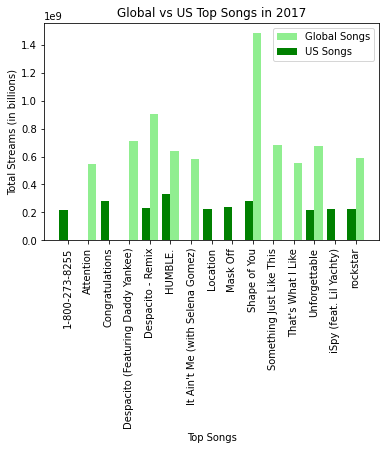

In [28]:
#create x vaiable 
unique_top_songs = global_vs_us_2017["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2017["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2017["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis + 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis - 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2017")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2017.png")

#show plot
plt.show()

In [29]:
#find songs that appear on both top lists
both = global_vs_us_2017.loc[(global_vs_us_2017["US Streams"] > 0) & (global_vs_us_2017["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2017)

#find percent of US songs that appear in global top ten
song_percent_2017 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2017}% of the same top ten songs as the global charts in 2017.") 

The US charts had 50.0% of the same top ten songs as the global charts in 2017.


Further analysis into the top 100 songs for 2017

In [34]:
top100_merged = pd.merge(top_songs_2017_ext, top_songs_US_2017_ext, how="outer", on=["title"])
len(outer_merged)
top100_merged

,title,total streams_x,date,artist,region,total streams_y
0,Shape of You,1.485011e+09,2017.0,Ed Sheeran,United States,278916058.0
1,Despacito - Remix,9.013116e+08,2017.0,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068.0
2,Despacito (Featuring Daddy Yankee),7.139895e+08,2017.0,Luis Fonsi,United States,94972759.0
3,Something Just Like This,6.848113e+08,2017.0,"The Chainsmokers, Coldplay",United States,143171255.0
4,Unforgettable,6.757906e+08,2017.0,"French Montana, Swae Lee",United States,215180711.0
...,...,...,...,...,...,...
135,Moves,NaN,2017.0,Big Sean,United States,76563898.0
136,First Day Out,NaN,2017.0,Tee Grizzley,United States,75507666.0
137,You Was Right,NaN,2017.0,Lil Uzi Vert,United States,74207159.0
138,Both (feat. Drake),NaN,2017.0,Gucci Mane,United States,74153982.0


In [35]:
#create df for global vs us streams 
global_vs_us_2017 = pd.DataFrame({"Songs": top100_merged["title"], "US Streams": top100_merged["total streams_y"], "Global Streams": top100_merged["total streams_x"]})

#reset df index
global_vs_us_2017 = global_vs_us_2017.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2017['Global Streams'] = global_vs_us_2017['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2017['US Streams'] = global_vs_us_2017['US Streams'].fillna(0)

#print df
global_vs_us_2017

,Songs,US Streams,Global Streams
0,1-800-273-8255,216950629.0,445710786.0
1,24K Magic,75607599.0,256687612.0
2,2U (feat. Justin Bieber),0.0,381471303.0
3,Ahora Dice,0.0,207600013.0
4,Attention,121686882.0,548253656.0
...,...,...,...
135,goosebumps,196490882.0,250752479.0
136,iSpy (feat. Lil Yachty),224773101.0,321574272.0
137,pick up the phone,83598597.0,0.0
138,rockstar,225517132.0,592356193.0


In [38]:
#find songs that appear on both top lists
both = global_vs_us_2017.loc[(global_vs_us_2017["US Streams"] > 0) & (global_vs_us_2017["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2017_ext)

#find percent of US songs that appear in global top ten
song_percent_2017 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2017}% of the same top 100 songs as the global charts in 2017.")

The US charts had 60.0% of the same top 100 songs as the global charts in 2017.


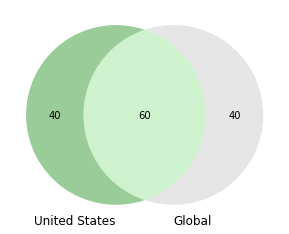

In [43]:
#create venn diagram
venn2([set(top_songs_US_2017_ext["title"]),
       set(top_songs_2017_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("_top_songs_2017_venn.png")

Top Songs 2018

In [44]:
# create data frame that only includes songs and streaming information for 2018
df_2018 = regional_df[(regional_df["date"] == 2018)]
df_2018.head()

,date,title,artist,region,total streams
66579,2018,!,O.S.T.R.,Poland,123714.0
66580,2018,!I'll Be Back!,Rilès,France,36343.0
66581,2018,"""42"" - From SR3MM","Rae Sremmurd, Swae Lee, Slim Jxmmi",United States,297731.0
66582,2018,"""Jag fakking hatar er""","ODZ, Young Earth Sauce",Sweden,235489.0
66583,2018,"""Read All About It, Pt. III""",Emeli Sandé,Belgium,5479.0


In [46]:
# double bracket to keep from changing to a series, this line also totals the non global streams for each song
songs_by_total_streams18=df_2018.groupby("title")[["total streams"]].sum()
songs_by_total_streams18

,total streams
title,
!,123714.0
!I'll Be Back!,36343.0
"""42"" - From SR3MM",297731.0
"""Jag fakking hatar er""",235489.0
"""Read All About It, Pt. III""",8888.0
...,...
운명 The Chance of Love,1070.0
지켜줄게 Save You,3900.0
파란 봄,4237.0


In [47]:
# sort dataframe of all 2018 songsand streaming numbers by total streams in descending order 
songs_2018 = songs_by_total_streams18.sort_values('total streams', ascending = False)
songs_2018

,total streams
title,
God's Plan,1.104866e+09
SAD!,7.406785e+08
In My Feelings,6.926642e+08
Better Now,6.640538e+08
Psycho (feat. Ty Dolla $ign),6.609611e+08
...,...
Homework As$ignment,1.002000e+03
Girl on Fire,1.002000e+03
Zaudējam Brāli,1.002000e+03


In [49]:
# save top ten rows by streaming 
top_songs_2018 = songs_2018.head(10)

#print top ten
top_songs_2018.reset_index()

,title,total streams
0,God's Plan,1.104866e+09
1,SAD!,7.406785e+08
2,In My Feelings,6.926642e+08
3,Better Now,6.640538e+08
4,Psycho (feat. Ty Dolla $ign),6.609611e+08
5,I Like It,6.562499e+08
6,One Kiss (with Dua Lipa),6.338316e+08
7,Girls Like You (feat. Cardi B),5.914740e+08
8,Lucid Dreams,5.763290e+08
9,IDGAF,5.694874e+08


In [50]:
#save top 100 rows by streaming for further analysis section
top_songs_2018_ext = songs_2018.head(100)
top_songs_2018_ext

,total streams
title,
God's Plan,1.104866e+09
SAD!,7.406785e+08
In My Feelings,6.926642e+08
Better Now,6.640538e+08
Psycho (feat. Ty Dolla $ign),6.609611e+08
...,...
Criminal,2.157794e+08
Pray For Me (with Kendrick Lamar),2.139540e+08
No Es Justo,2.124644e+08


In [51]:
#create datframe for US 2017
df_US_2018 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2018)]

#sort df by total streams 
songs_US_2018 = df_US_2018.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2018 = songs_US_2018.head(10)

#print top ten
top_songs_US_2018

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629.0
122834,2018,SAD!,XXXTENTACION,United States,332633597.0
119442,2018,Psycho (feat. Ty Dolla $ign),Post Malone,United States,306877012.0
106537,2018,Lucid Dreams,Juice WRLD,United States,299907223.0
105578,2018,Look Alive (feat. Drake),BlocBoy JB,United States,266861797.0
112843,2018,Nice For What,Drake,United States,263455062.0
74661,2018,Better Now,Post Malone,United States,254098207.0
98444,2018,In My Feelings,Drake,United States,245715031.0
110459,2018,Moonlight,XXXTENTACION,United States,245410462.0
96383,2018,I Like It,"Cardi B, Bad Bunny, J Balvin",United States,240430007.0


In [53]:
#save top 100 rows by streaming for further analysis section
top_songs_US_2018_ext = songs_US_2018.head(100)
top_songs_US_2018_ext

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629.0
122834,2018,SAD!,XXXTENTACION,United States,332633597.0
119442,2018,Psycho (feat. Ty Dolla $ign),Post Malone,United States,306877012.0
106537,2018,Lucid Dreams,Juice WRLD,United States,299907223.0
105578,2018,Look Alive (feat. Drake),BlocBoy JB,United States,266861797.0
...,...,...,...,...,...
97707,2018,IDGAF,Dua Lipa,United States,86397943.0
93908,2018,Heaven,Kane Brown,United States,86069146.0
74561,2018,Better,Khalid,United States,85156431.0
106635,2018,Lucky You (feat. Joyner Lucas),Eminem,United States,85144271.0


In [54]:
#merge the top ten US data frame with the top ten non-global data frame 
outer_merged18 = pd.merge(top_songs_2018, top_songs_US_2018, how="outer", on=["title"])
outer_merged18

,title,total streams_x,date,artist,region,total streams_y
0,God's Plan,1.104866e+09,2018.0,Drake,United States,453226629.0
1,SAD!,7.406785e+08,2018.0,XXXTENTACION,United States,332633597.0
2,In My Feelings,6.926642e+08,2018.0,Drake,United States,245715031.0
3,Better Now,6.640538e+08,2018.0,Post Malone,United States,254098207.0
4,Psycho (feat. Ty Dolla $ign),6.609611e+08,2018.0,Post Malone,United States,306877012.0
5,I Like It,6.562499e+08,2018.0,"Cardi B, Bad Bunny, J Balvin",United States,240430007.0
6,One Kiss (with Dua Lipa),6.338316e+08,NaN,NaN,NaN,NaN
7,Girls Like You (feat. Cardi B),5.914740e+08,NaN,NaN,NaN,NaN
8,Lucid Dreams,5.763290e+08,2018.0,Juice WRLD,United States,299907223.0
9,IDGAF,5.694874e+08,NaN,NaN,NaN,NaN


In [55]:
#create df for global vs us streams 
global_vs_us_2018 = pd.DataFrame({"Songs": outer_merged18["title"], "US Streams": outer_merged18["total streams_y"], "Global Streams": outer_merged18["total streams_x"]})

#reset df index
global_vs_us_2018 = global_vs_us_2018.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2018['Global Streams'] = global_vs_us_2018['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2018['US Streams'] = global_vs_us_2018['US Streams'].fillna(0)

#print df
global_vs_us_2018

,Songs,US Streams,Global Streams
0,Better Now,254098207.0,6.640538e+08
1,Girls Like You (feat. Cardi B),0.0,5.914740e+08
2,God's Plan,453226629.0,1.104866e+09
3,I Like It,240430007.0,6.562499e+08
4,IDGAF,0.0,5.694874e+08
5,In My Feelings,245715031.0,6.926642e+08
6,Look Alive (feat. Drake),266861797.0,0.000000e+00
7,Lucid Dreams,299907223.0,5.763290e+08
8,Moonlight,245410462.0,0.000000e+00
9,Nice For What,263455062.0,0.000000e+00


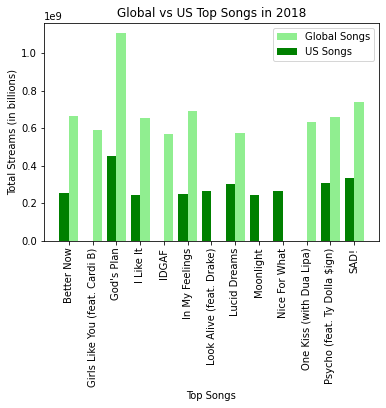

In [56]:
#create x vaiable 
unique_top_songs = global_vs_us_2018["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2018["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2018["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis + 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis - 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2018")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2018.png")

#show plot
plt.show()

In [58]:
#find songs that appear on both top lists
both = global_vs_us_2018.loc[(global_vs_us_2018["US Streams"] > 0) & (global_vs_us_2018["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2018)

#find percent of US songs that appear in global top ten
song_percent_2018 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2018}% of the same top ten songs as the global charts in 2018.") 


The US charts had 70.0% of the same top ten songs as the global charts in 2018.


In [ ]:
#create datframe for US 2017
df_2018 = regional_df[(regional_df["date"] == 2018)]

#sort df by total streams 
songs_2018 = df_2018.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2018 = songs_2018.head(10)

#save top 100 rows by streaming 
top_songs_2018_ext = songs_2018.head(100)

#print top ten
top_songs_2018


In [ ]:
#create datframe for US 2018
df_US_2018 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2018)]

#sort df by total streams 
songs_US_2018 = df_US_2018.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2018 = songs_US_2018.head(10)

#save top 100 rows by streaming 
top_songs_US_2018_ext = songs_US_2018.head(100)

#print top ten
top_songs_US_2018

In [ ]:
#create variable for top songs 
top_songs_18 = top_songs_US_2018["title"]

#append variable to add global top songs 
new_top_2018 = top_songs_18.append(top_songs_2018["title"])

#drop duplicate values 
new_top_2018 = new_top_2018.drop_duplicates()

#create variable for US total streams 
us_songs_2018 = top_songs_US_2018[("total streams")]

#create variable for global total streams 
global_songs_2018 = top_songs_2018[("total streams")]

In [ ]:
#create df for global vs us streams 
global_vs_us_2018 = pd.DataFrame({"Songs": new_top_2018, "US Streams": us_songs_2018, "Global Streams": global_songs_2018})

#reset df index
global_vs_us_2018 = global_vs_us_2018.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2018['Global Streams'] = global_vs_us_2018['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2018['US Streams'] = global_vs_us_2018['US Streams'].fillna(0)

#print df
global_vs_us_2018

In [ ]:

#create x variable 
unique_top_songs = global_vs_us_2018["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2018["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2018["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2018")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2018.png")

#show plot
plt.show()

Further analysis into the top 100 songs for 2018

In [ ]:
#find songs that appear on both top lists
both = global_vs_us_2018.loc[(global_vs_us_2018["US Streams"] > 0) & (global_vs_us_2018["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2018["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2018 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2018}% of the same top 10 songs as the global charts in 2018.")

In [ ]:
#create variable for top songs 
top_songs_18 = top_songs_US_2018_ext["title"]

#append variable to add global top songs 
new_top_2018 = top_songs_18.append(top_songs_2018_ext["title"])

#drop duplicate values
new_top_2018 = new_top_2018.drop_duplicates()

#create variable for US total streams 
us_songs_2018 = top_songs_US_2018_ext[("total streams")]

#create variable for global total streams 
global_songs_2018 = top_songs_2018_ext[("total streams")]


In [ ]:
#create df for global vs us streams 
global_vs_us_2018 = pd.DataFrame({"Songs": new_top_2018, "US Streams": us_songs_2018, "Global Streams": global_songs_2018})

#reset df index
global_vs_us_2018 = global_vs_us_2018.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2018['Global Streams'] = global_vs_us_2018['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2018['US Streams'] = global_vs_us_2018['US Streams'].fillna(0)

#print df
global_vs_us_2018

In [ ]:
#find songs that appear on both top lists
both = global_vs_us_2018.loc[(global_vs_us_2018["US Streams"] > 0) & (global_vs_us_2018["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2018_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2018 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2018}% of the same top 100 songs as the global charts in 2018.")

In [ ]:
#create venn diagram
venn2([set(top_songs_US_2018_ext["title"]),
       set(top_songs_2018_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("_top_songs_2018_venn.png")

Top Songs 2019

In [ ]:
#create datframe for US 2019
df_2019 = regional_df[(regional_df["date"] == 2019)]

#sort df by total streams 
songs_2019 = df_2019.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2019 = songs_2019.head(10)

#save top 100 rows by streaming 
top_songs_2019_ext = songs_2019.head(100)

#print top ten
top_songs_2019

In [ ]:
#create datframe for US 2019
df_US_2019 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2019)]

#sort df by total streams 
songs_US_2019 = df_US_2019.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2019 = songs_US_2019.head(10)

#save top 100 rows by streaming 
top_songs_US_2019_ext = songs_2019.head(100)

#print top ten
top_songs_US_2019

In [ ]:
#create variable for top songs 
top_songs_19 = top_songs_US_2019["title"]

#append variable to add global top songs 
new_top_2019 = top_songs_19.append(top_songs_2019["title"])

new_top_2019 = new_top_2019.drop_duplicates()

#create variable for US total streams 
us_songs_2019 = top_songs_US_2019["total streams"]

#create variable for global total streams 
global_songs_2019 = top_songs_2019["total streams"]

In [ ]:
#create df for global vs us streams 
global_vs_us_2019 = pd.DataFrame({"Songs": new_top_2019, "US Streams": us_songs_2019, "Global Streams": global_songs_2019})

#reset df index
global_vs_us_2019 = global_vs_us_2019.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2019['Global Streams'] = global_vs_us_2019['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2019['US Streams'] = global_vs_us_2019['US Streams'].fillna(0)

#print df
global_vs_us_2019

In [ ]:
#create x variable 
unique_top_songs = global_vs_us_2019["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2019["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2019["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2019")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2019.png")

#show plot
plt.show()

In [ ]:
#find songs that appear on both top lists
both = global_vs_us_2019.loc[(global_vs_us_2019["US Streams"] > 0) & (global_vs_us_2019["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2019["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2019 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2019}% of the same top ten songs as the global charts in 2019.")

Further analysis into the top 100 songs in 2019

In [ ]:
#create variable for top songs 
top_songs_19 = top_songs_US_2019_ext["title"]

#append variable to add global top songs 
new_top_2019 = top_songs_19.append(top_songs_2019_ext["title"])

#drop duplicate values
new_top_2019 = new_top_2019.drop_duplicates()

#create variable for US total streams 
us_songs_2019 = top_songs_US_2019_ext["total streams"]

#create variable for global total streams 
global_songs_2019 = top_songs_2019_ext["total streams"]

In [ ]:
#create df for global vs us streams 
global_vs_us_2019 = pd.DataFrame({"Songs": new_top_2019, "US Streams": us_songs_2019, "Global Streams": global_songs_2019})

#reset df index
global_vs_us_2019 = global_vs_us_2019.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2019['Global Streams'] = global_vs_us_2019['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2019['US Streams'] = global_vs_us_2019['US Streams'].fillna(0)

#print df
global_vs_us_2019

In [ ]:
#find songs that appear on both top lists
both = global_vs_us_2019.loc[(global_vs_us_2019["US Streams"] > 0) & (global_vs_us_2019["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2019_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2019 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2019}% of the same top 100 songs as the global charts in 2019.")

In [ ]:
#create venn diagram
venn2([set(top_songs_US_2019_ext["title"]),
       set(top_songs_2019_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("top_songs_2019_venn.png")

In [ ]:
#create datframe for US 2017
df_2020 = regional_df[(regional_df["date"] == 2020)]

#sort df by total streams 
songs_2020 = df_2020.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2020 = songs_2020.head(10)

#save top 100 rows by streaming 
top_songs_2020_ext = songs_2020.head(100)

#print top ten
top_songs_2020

In [ ]:
#create datframe for US 2020
df_US_2020 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2020)]

#sort df by total streams 
songs_US_2020 = df_US_2020.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2020 = songs_US_2020.head(10)

#save top 100 rows by streaming 
top_songs_US_2020_ext = songs_US_2020.head(100)

#print top ten
top_songs_US_2020

In [ ]:
#create variable for top songs 
top_songs_20 = top_songs_US_2020["title"]

#append variable to add global top songs 
new_top_2020 = top_songs_20.append(top_songs_2020["title"])

#drop duplicate values
new_top_2020 = new_top_2020.drop_duplicates()

#create variable for US total streams 
us_songs_2020 = top_songs_US_2020["total streams"]

#create variable for global total streams 
global_songs_2020 = top_songs_2020["total streams"]

In [ ]:
#create df for global vs us streams 
global_vs_us_2020 = pd.DataFrame({"Songs": new_top_2020, "US Streams": us_songs_2020, "Global Streams": global_songs_2020})

#reset df index
global_vs_us_2020 = global_vs_us_2020.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2020['Global Streams'] = global_vs_us_2020['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2020['US Streams'] = global_vs_us_2020['US Streams'].fillna(0)

#print df
global_vs_us_2020

In [ ]:
#create x variable 
unique_top_songs = global_vs_us_2020["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2020["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2020["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2020")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2020.png")

#show plot
plt.show()

In [ ]:
#find songs that appear on both top lists
both = global_vs_us_2020.loc[(global_vs_us_2020["US Streams"] > 0) & (global_vs_us_2020["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2020["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2020 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2020}% of the same top ten songs as the global charts in 2020.")

Further analysis into the top 100 songs for 2020

In [ ]:
#create variable for top songs 
top_songs_20 = top_songs_US_2020_ext["title"]

#append variable to add global top songs 
new_top_2020 = top_songs_20.append(top_songs_2020_ext["title"])

#drop duplicate values
new_top_2020 = new_top_2020.drop_duplicates()

#create variable for US total streams 
us_songs_2020 = top_songs_US_2020_ext["total streams"]

#create variable for global total streams 
global_songs_2020 = top_songs_2020_ext["total streams"]

In [ ]:
#create df for global vs us streams 
global_vs_us_2020 = pd.DataFrame({"Songs": new_top_2020, "US Streams": us_songs_2020, "Global Streams": global_songs_2020})

#reset df index
global_vs_us_2020 = global_vs_us_2020.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2020['Global Streams'] = global_vs_us_2020['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2020['US Streams'] = global_vs_us_2020['US Streams'].fillna(0)

#print df
global_vs_us_2020

In [ ]:
#find songs that appear on both top lists
both = global_vs_us_2020.loc[(global_vs_us_2020["US Streams"] > 0) & (global_vs_us_2020["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2020_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2020 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2020}% of the same top ten songs as the global charts in 2020.")

In [ ]:
#create venn diagram
venn2([set(top_songs_US_2020_ext["title"]),
       set(top_songs_2020_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("top_songs_2020_venn.png")

Top Songs 2021

In [ ]:
#create datframe for US 2017
df_2021 = regional_df[(regional_df["date"] == 2021)]

#sort df by total streams 
songs_2021 = df_2021.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2021 = songs_2021.head(10)

#save top 100 rows by streaming 
top_songs_2021_ext = songs_2021.head(100)

#print top ten
top_songs_2021

In [ ]:
#create datframe for US 2021, why is this the same as previous cell***?
df_US_2021 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2021)]

#sort df by total streams 
songs_US_2021 = df_US_2021.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2021 = songs_US_2021.head(10)

#save top 100 rows by streaming 
top_songs_US_2021_ext = songs_US_2021.head(100)

#print top ten
top_songs_US_2021

In [ ]:
#create variable for top songs 
top_songs_21 = top_songs_US_2021["title"]

#append variable to add global top songs 
new_top_2021 = top_songs_21.append(top_songs_2021["title"])

#drop duplicate values
new_top_2021 = new_top_2021.drop_duplicates()

#create variable for US total streams 
us_songs_2021 = top_songs_US_2021["total streams"]

#create variable for global total streams 
global_songs_2021 = top_songs_2021["total streams"]

In [ ]:
#create df for global vs us streams 
global_vs_us_2021 = pd.DataFrame({"Songs": new_top_2021, "US Streams": us_songs_2021, "Global Streams": global_songs_2021})

#reset df index
global_vs_us_2021 = global_vs_us_2021.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2021['Global Streams'] = global_vs_us_2021['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2021['US Streams'] = global_vs_us_2021['US Streams'].fillna(0)

#print df
global_vs_us_2021

In [ ]:

#create x variable 
unique_top_songs = global_vs_us_2021["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2021["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2021["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2021")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2021.png")


#show plot
plt.show()

In [ ]:
#find songs that appear on both top lists
both = global_vs_us_2021.loc[(global_vs_us_2021["US Streams"] > 0) & (global_vs_us_2021["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2021["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2021 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2021}% of the same top ten songs as the global charts in 2021.")

Further analysis into the top 100 song in 2021

In [ ]:
#create variable for top songs 
top_songs_21 = top_songs_US_2021_ext["title"]

#append variable to add global top songs 
new_top_2021 = top_songs_21.append(top_songs_2021_ext["title"])

#drop duplicate values
new_top_2021 = new_top_2021.drop_duplicates()

#create variable for US total streams 
us_songs_2021 = top_songs_US_2021_ext["total streams"]

#create variable for global total streams 
global_songs_2021 = top_songs_2021_ext["total streams"]

In [ ]:
#create df for global vs us streams 
global_vs_us_2021 = pd.DataFrame({"Songs": new_top_2021, "US Streams": us_songs_2021, "Global Streams": global_songs_2021})

#reset df index
global_vs_us_2021 = global_vs_us_2021.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2021['Global Streams'] = global_vs_us_2021['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2021['US Streams'] = global_vs_us_2021['US Streams'].fillna(0)

#print df
global_vs_us_2021

In [ ]:
#find songs that appear on both top lists
both = global_vs_us_2021.loc[(global_vs_us_2021["US Streams"] > 0) & (global_vs_us_2021["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2021_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2021 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2021}% of the same top 100 songs as the global charts in 2021.")

In [ ]:
#create venn diagram
venn2([set(top_songs_US_2021_ext["title"]),
       set(top_songs_2021_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("top_songs_2021_venn.png")

Top Songs Overall 2017-2021

In [ ]:
#create datframe for US 2017
df_overall = regional_df

#sort df by total streams 
songs_overall = df_overall.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_overall = songs_overall.head(10)

#save top 100 rows by streaming 
top_songs_overall_ext = songs_overall.head(100)

#print top ten
top_songs_overall

In [ ]:
#create datframe for US overall
df_US_overall = regional_df[regional_df["region"] == "United States"]

#sort df by total streams 
songs_US_overall = df_US_overall.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_overall = songs_US_overall.head(10)

#save top 100 rows by streaming 
top_songs_US_overall_ext = songs_US_overall.head(100)

#print top ten
top_songs_US_overall

In [ ]:
#create variable for top songs 
top_songs_all = top_songs_US_overall["title"]

#append variable to add global top songs 
new_top_overall = top_songs_all.append(top_songs_overall["title"])

new_top_overall = new_top_overall.drop_duplicates()
#create variable for US total streams 
us_songs_overall = top_songs_US_overall["total streams"]

#create variable for global total streams 
global_songs_overall = top_songs_overall["total streams"]

In [ ]:
#create df for global vs us streams 
global_vs_us_overall = pd.DataFrame({"Songs": new_top_overall, "US Streams": us_songs_overall, "Global Streams": global_songs_overall})

#reset df index
global_vs_us_overall = global_vs_us_overall.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_overall['Global Streams'] = global_vs_us_overall['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_overall['US Streams'] = global_vs_us_overall['US Streams'].fillna(0)

#print df
global_vs_us_overall


In [ ]:
#create x variable 
unique_top_songs = global_vs_us_overall["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_overall["Global Streams"]

#define y variable #2
us_songs = global_vs_us_overall["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs 2017-2021")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_overall.png")

#show plot
plt.show()

In [ ]:
#find songs that appear on both top lists
both = global_vs_us_overall.loc[(global_vs_us_overall["US Streams"] > 0) & (global_vs_us_overall["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_overall["title"].count()

#find percent of US songs that appear in global top ten
song_percent_overall = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_overall}% of the same top ten songs as the global charts 2017-2021.")

In [ ]:
#create variable for top songs 
top_songs_all = top_songs_US_overall_ext["title"]

#append variable to add global top songs 
new_top_overall = top_songs_all.append(top_songs_overall_ext["title"])

#drop duplicate values 
new_top_overall = new_top_overall.drop_duplicates()

#create variable for US total streams 
us_songs_overall = top_songs_US_overall_ext["total streams"]

#create variable for global total streams 
global_songs_overall = top_songs_overall_ext["total streams"]

In [ ]:
#create df for global vs us streams 
global_vs_us_overall = pd.DataFrame({"Songs": new_top_overall, "US Streams": us_songs_overall, "Global Streams": global_songs_overall})

#reset df index
global_vs_us_overall = global_vs_us_overall.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_overall['Global Streams'] = global_vs_us_overall['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_overall['US Streams'] = global_vs_us_overall['US Streams'].fillna(0)

#print df
global_vs_us_overall

In [ ]:
#find songs that appear on both top lists
both = global_vs_us_overall.loc[(global_vs_us_overall["US Streams"] > 0) & (global_vs_us_overall["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_overall_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_overall = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_overall}% of the same top 100 songs as the global charts 2017-2021.")

In [ ]:
#create venn diagram 
venn2([set(top_songs_US_overall_ext["title"]),
       set(top_songs_overall_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("top_songs_overall_venn.png")

In [ ]:
# create ne data frame that only includes songs and streaming data from 2017
df_2017_all = chart_data[(chart_data["date"] == 2017)]

# sort data frame by total streams to determine the most popular song from this year
all_songs_2017 = df_2017_all.sort_values('total streams', ascending = False)

all_songs_2017

In [ ]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
shape_of_you = all_songs_2017[(all_songs_2017["title"] == "Shape of You") & (chart_data["region"] != "Global")]
shape_of_you

In [ ]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original data frame)
len(shape_of_you)

In [ ]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
shape_top = shape_of_you.head(10)
shape_top

In [ ]:
# create bar plot to better visualize each country's contribution 
shape_bar = shape_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

# add title
plt.title("Shape of You: Top Regions (2017)")

# label xaxis
plt.xlabel("Country")

# lable yaxis
plt.ylabel("Streams (hundred millions)")

# adjust graph layout 
plt.tight_layout()

# export chart to pngs
plt.savefig("Shape_Top_Ten_Countries.png")

# show graph 
plt.show()   

In [ ]:
# create venn diagram for easier visual analysis
venn2([set(top_ten.index), 
       set(shape_top['region'].to_list())],
       set_labels=('Global', 'Shape of You'),
       set_colors=('lightgreen', 'green'),
     )

In [ ]:
# create ne data frame that only includes songs and streaming data from 2018
all_songs_18 = chart_data[(chart_data["date"] == 2018)]

# sort data frame by total streams to determine the most popular song from this year
top_songs_18 = all_songs_18.sort_values('total streams', ascending = False)

top_songs_18

In [ ]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
gods_plan = top_songs_18[(top_songs_18["title"] == "God's Plan") & (chart_data["region"] != "Global")]
gods_plan

In [ ]:
# check your work, if correct should be less than or equal to 68 
len(gods_plan)

In [ ]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
gp_top = gods_plan.head(10)
gp_top

In [ ]:
# create bar plot to better visualize each of the top ten country's contribution 
gp_bar = gp_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

# add title
plt.title("God's Plan: Top Regions (2018)")

# label xaxis
plt.xlabel("Country")

# lable yaxis
plt.ylabel("Streams (hundred millions)")

# adjust graph layout 
plt.tight_layout()

# export chart to pngs
plt.savefig("gods_plan_top ten_countries.png")

# show graph 
plt.show()   

In [ ]:
# create a venn diagram to show how many of the overall top contries contributed to this song 
venn2([set(top_ten.index), 
       set(gp_top['region'].to_list())],
       set_labels=('Global', "God's Plan"),
       set_colors=('lightgreen', 'green'),
     )

In [ ]:
# filter data frame to only display songs from 2019
all_songs_2019 = chart_data[(chart_data["date"] == 2019)]

# sort dataframe by total streams (in descending order) to determine the most popular song from this year 
sorted_songs_2019 = all_songs_2019.sort_values('total streams', ascending = False)

sorted_songs_2019

In [ ]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
señorita = sorted_songs_2019[(sorted_songs_2019["title"] == "Señorita") & (chart_data["artist"] == "Shawn Mendes, Camila Cabello") & (chart_data["region"] != "Global")]
# this year had multiple songs named "señorita" so an extra filter for artist had to be added above 
señorita

In [ ]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original df)
len(señorita)

In [ ]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
señorita_top = señorita.head(10)
señorita_top

In [ ]:
#create bar plot to show top 10 countries streams 
señorita_bar = señorita_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Señorita: Top Regions (2019)")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (hundred millions)")

# top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("señorita_top_countries.png")

#show graph 
plt.show()   

In [ ]:
# create diagram to visualize how many of the top streaming contries were also a top contributor for this song 
venn2([set(top_ten.index), 
       set(señorita_top['region'].to_list())],
       set_labels=('Global', 'Señorita'),
       set_colors=('lightgreen', 'green'),
     )

In [ ]:
# filter data frame to only display songs and streaming data for 2020
all_songs_2020 = chart_data[(chart_data["date"] == 2020)]

# sort dataframe by total streams (in descending order) to determine the most popular song from this year 
sorted_songs_2020 = all_songs_2020.sort_values('total streams', ascending = False)
sorted_songs_2020


In [ ]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
bl_2020 = sorted_songs_2020[(sorted_songs_2020["title"] == "Blinding Lights") & (chart_data["region"] != "Global")]
bl_2020

In [ ]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original df)
len(bl_2020)

In [ ]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
bl_2020_top = bl_2020.head(10)
bl_2020_top

In [ ]:
# create bar plot to visualize how each of these top countries contributed 
bl_bar_2020 = bl_2020_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

# add title
plt.title("Blinding Lights: Top Regions (2020)")

# label xaxis
plt.xlabel("Country")

# lable yaxis
plt.ylabel("Streams (hundred millions)")

# top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

# adjust graph layout 
plt.tight_layout()

# export chart to pngs
plt.savefig("blinding_lights_2020_top_countries.png")

# show graph 
plt.show() 

In [ ]:
# create diagram to visualize how many of the top streaming contries were also a top contributor for this song 
venn2([set(top_ten.index), 
       set(bl_2020_top['region'].to_list())],
       set_labels=('Global', 'Blinding Lights'),
       set_colors=('lightgreen', 'green'),
     )

In [ ]:
# create new data frame that only includes songs and streaming data for 2021
all_songs_2021 = chart_data[(chart_data["date"] == 2021)]

# sort data frame by total streams to determine the most popular song from this year
sorted_songs_2021 = all_songs_2021.sort_values('total streams', ascending = False)

sorted_songs_2021

In [ ]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
drivers_license = sorted_songs_2021[(sorted_songs_2021["title"] == "drivers license") & (chart_data["region"] != "Global")]
drivers_license

In [ ]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original df)
len(drivers_license)

In [ ]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
drivers_license_top = drivers_license.head(10)
drivers_license_top

In [ ]:
#create bar plot to show top 10 countries streams 
drivers_license_bar = drivers_license_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("drivers license: Top Regions (2021)")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (hundred millions)")

# top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("drivers_license_top_countries.png")

#show graph 
plt.show()

In [ ]:
# create venn diagram to visualize how many of the top streaming contries were also a top contributor for song 
venn2([set(top_ten.index), 
       set(drivers_license_top['region'].to_list())],
       set_labels=('Global', 'drivers license'),
       set_colors=('lightgreen', 'green'),
     )

Question 3
Which artists were the most influential globally (broken down by year)?

In [ ]:
#group 2017 dataframe by artist
artist_2017 = df_2017.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2017 = artist_2017["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2017

In [ ]:
#plot top ten artists 2017
artists_2017_plot = top_artist_2017.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2017")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show() 

In [ ]:
#group 2018 dataframe by artist
artist_2018 = df_2018.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2018 = artist_2018["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2018

In [ ]:
#plot top ten artists 2018 
artists_2018_plot = top_artist_2018.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2018")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show() 

In [ ]:
#group 2019 dataframe by artist
artist_2019 = df_2019.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2019 = artist_2019["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2019

In [ ]:
#plot top ten artists 2021 
artists_2019_plot = top_artist_2019.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2019")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show()  

In [ ]:
#group 2020 dataframe by artist
artist_2020 = df_2020.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2020 = artist_2020["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2020 
top_artist_2020

In [ ]:
#plot top ten artists 2021 
artists_2020_plot = top_artist_2020.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2020")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show()  

In [ ]:
#group 2021 dataframe by artist
artist_2021 = df_2021.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2021 = artist_2021["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2021

In [ ]:
#plot top ten artists 2021 
artists_2021_plot = top_artist_2021.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2021")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show() 